In [1]:
import pandas as pd
import pandas.testing as tm
import re, seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from textwrap import wrap
import requests

np.set_printoptions(edgeitems=100)
np.core.arrayprint._line_width = 100
sns.set()

In [13]:
data = pd.read_csv('result_10_100v2.txt',sep=' ',header=0)
#data = data.loc[data.Restriction1 == 0]

viable_data = data.loc[data.Restriction1 == 0].loc[data.Restriction2 == 0].sort_values(by=['Pcost'])
unit_hit = data.loc[data.Restriction1 == 0]
demand_hit = data.loc[data.Restriction2 == 0]

display(data)
display(viable_data)
display(unit_hit)
display(demand_hit)


,Solver,Grids,Delta_A,Delta_B,Anneal_Time,Chain_Strength,Chain_Break,Energy,Pcost,Time,Restriction1,Restriction2
0,4,10,45000,25,50,14400.0,0.800,-417224.689,398.911,0.0,0,7.992
1,4,10,45000,25,50,14400.0,0.833,-347764.974,521.237,0.0,0,41.136
2,4,10,45000,25,50,14400.0,0.808,-331878.033,313.495,0.0,0,0.084
3,4,10,45000,25,50,14400.0,0.792,-327782.871,412.974,0.0,0,22.608
4,4,10,45000,25,50,14400.0,0.800,-323293.263,241.979,0.0,1,-22.104
...,...,...,...,...,...,...,...,...,...,...,...,...
10095,4,10,2000,5,100,120.0,0.958,97806.908,21.858,0.0,8,-89.360
10096,4,10,2000,5,100,120.0,0.925,104560.647,232.126,0.0,5,-46.964
10097,4,10,2000,5,100,120.0,0.950,112574.621,153.104,0.0,4,-60.212
10098,4,10,2000,5,100,120.0,0.942,121785.627,110.479,0.0,6,-59.532


,Solver,Grids,Delta_A,Delta_B,Anneal_Time,Chain_Strength,Chain_Break,Energy,Pcost,Time,Restriction1,Restriction2


,Solver,Grids,Delta_A,Delta_B,Anneal_Time,Chain_Strength,Chain_Break,Energy,Pcost,Time,Restriction1,Restriction2
0,4,10,45000,25,50,14400.0,0.800,-417224.689,398.911,0.0,0,7.992
1,4,10,45000,25,50,14400.0,0.833,-347764.974,521.237,0.0,0,41.136
2,4,10,45000,25,50,14400.0,0.808,-331878.033,313.495,0.0,0,0.084
3,4,10,45000,25,50,14400.0,0.792,-327782.871,412.974,0.0,0,22.608
5,4,10,45000,25,50,14400.0,0.817,-321265.704,416.111,0.0,0,11.928
...,...,...,...,...,...,...,...,...,...,...,...,...
9551,4,10,2000,5,100,120.0,0.950,-30590.683,265.061,0.0,0,-10.668
9569,4,10,2000,5,100,120.0,0.933,-30115.445,101.819,0.0,0,-71.216
9582,4,10,2000,5,100,120.0,0.942,-29748.592,427.171,0.0,0,17.864
9739,4,10,2000,5,100,120.0,0.942,-21125.968,79.961,0.0,0,-81.856


,Solver,Grids,Delta_A,Delta_B,Anneal_Time,Chain_Strength,Chain_Break,Energy,Pcost,Time,Restriction1,Restriction2


In [14]:
data = data.abs()
data["Restrictions"] = data.apply(lambda row: row.Restriction1 * row.Restriction2, axis=1)

mean1 = data.loc[data.Solver == 4].groupby(["Grids","Delta_A","Delta_B","Anneal_Time", "Chain_Strength"], as_index=False)["Restriction1"].mean()
mean2 = data.loc[data.Solver == 4].groupby(["Grids","Delta_A","Delta_B","Anneal_Time", "Chain_Strength"], as_index=False)["Restriction2"].mean()
mean3 = data.loc[data.Solver == 4].groupby(["Grids","Delta_A","Delta_B","Anneal_Time", "Chain_Strength"], as_index=False)["Chain_Break"].mean()
mean4 = data.loc[data.Solver == 4].groupby(["Grids","Delta_A","Delta_B","Anneal_Time", "Chain_Strength"], as_index=False)["Pcost"].mean()
display(mean1)
display(mean2)
display(mean3)
display(mean4)

,Grids,Delta_A,Delta_B,Anneal_Time,Chain_Strength,Restriction1
0,10,2000,2,100,120.0,1.222
1,10,2000,5,100,120.0,2.499
2,10,2500,2,100,120.0,0.836
3,10,4000,2,20,120.0,0.168
4,10,4000,2,40,120.0,0.222
5,10,4000,2,60,120.0,0.198
6,10,4000,2,80,120.0,0.176
7,10,4000,2,100,120.0,0.157
8,10,4000,5,100,120.0,1.419
9,10,45000,25,50,14400.0,1.140


,Grids,Delta_A,Delta_B,Anneal_Time,Chain_Strength,Restriction2
0,10,2000,2,100,120.0,45.979832
1,10,2000,5,100,120.0,54.875384
2,10,2500,2,100,120.0,50.545564
3,10,4000,2,20,120.0,64.991216
4,10,4000,2,40,120.0,62.511048
5,10,4000,2,60,120.0,63.242260
6,10,4000,2,80,120.0,64.724040
7,10,4000,2,100,120.0,65.352700
8,10,4000,5,100,120.0,49.596332
9,10,45000,25,50,14400.0,21.319320


,Grids,Delta_A,Delta_B,Anneal_Time,Chain_Strength,Chain_Break
0,10,2000,2,100,120.0,0.930593
1,10,2000,5,100,120.0,0.942650
2,10,2500,2,100,120.0,0.929107
3,10,4000,2,20,120.0,0.923526
4,10,4000,2,40,120.0,0.922868
5,10,4000,2,60,120.0,0.921415
6,10,4000,2,80,120.0,0.919561
7,10,4000,2,100,120.0,0.920807
8,10,4000,5,100,120.0,0.939306
9,10,45000,25,50,14400.0,0.801770


,Grids,Delta_A,Delta_B,Anneal_Time,Chain_Strength,Pcost
0,10,2000,2,100,120.0,210.665334
1,10,2000,5,100,120.0,179.174547
2,10,2500,2,100,120.0,195.436081
3,10,4000,2,20,120.0,131.788551
4,10,4000,2,40,120.0,137.450620
5,10,4000,2,60,120.0,138.237299
6,10,4000,2,80,120.0,130.748400
7,10,4000,2,100,120.0,127.182633
8,10,4000,5,100,120.0,199.201704
9,10,45000,25,50,14400.0,289.727370


Text(0.5, 1.0, 'Production Cost')

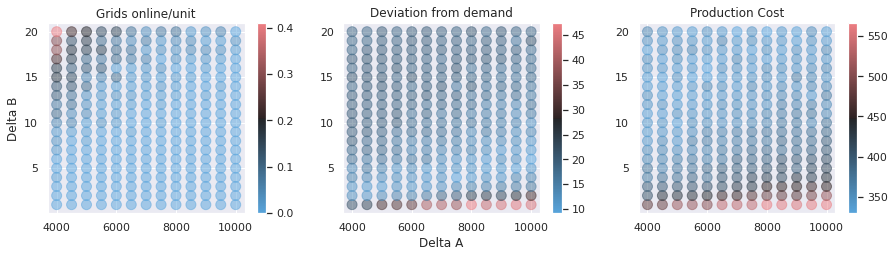

In [142]:
fig, ax = plt.subplots(1,3, figsize=(15, 3.5))

vmin, vmax = mean1.Restriction1.min(), mean1.Restriction1.max()
cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

ax[0].scatter(x=mean1.Delta_A, y=mean1.Delta_B, c=mean1.Restriction1,
          s=100, alpha=0.5, vmin=vmin, vmax=vmax, cmap=cmap)

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

# Draw the colorbar
fig.colorbar(points, ax=ax[0])
ax[0].set_title('Grids online/unit')
ax[0].set_ylabel('Delta B')

# ---------------------------------------------------------------------------

vmin2, vmax2 = mean2.Restriction2.min(), mean2.Restriction2.max()
cmap2 = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

ax[1].scatter(x=mean2.Delta_A, y=mean2.Delta_B, c=mean2.Restriction2,
          s=100, alpha=0.5, vmin=vmin2, vmax=vmax2, cmap=cmap2)

# Get a mappable object with the same colormap as the data
points2 = plt.scatter([], [], c=[], vmin=vmin2, vmax=vmax2, cmap=cmap2)

# Draw the colorbar
fig.colorbar(points2, ax=ax[1])
ax[1].set_title('Deviation from demand')
ax[1].set_xlabel('Delta A')

# ---------------------------------------------------------------------------

vmin3, vmax3 = mean3.Pcost.min(), mean3.Pcost.max()
cmap3 = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

ax[2].scatter(x=mean3.Delta_A, y=mean3.Delta_B, c=mean3.Pcost,
          s=100, alpha=0.5, vmin=vmin3, vmax=vmax3, cmap=cmap3)

# Get a mappable object with the same colormap as the data
points3 = plt.scatter([], [], c=[], vmin=vmin3, vmax=vmax3, cmap=cmap3)

# Draw the colorbar
fig.colorbar(points3, ax=ax[2])
ax[2].set_title('Production Cost')

Text(0, 0.5, 'Demand deviation')

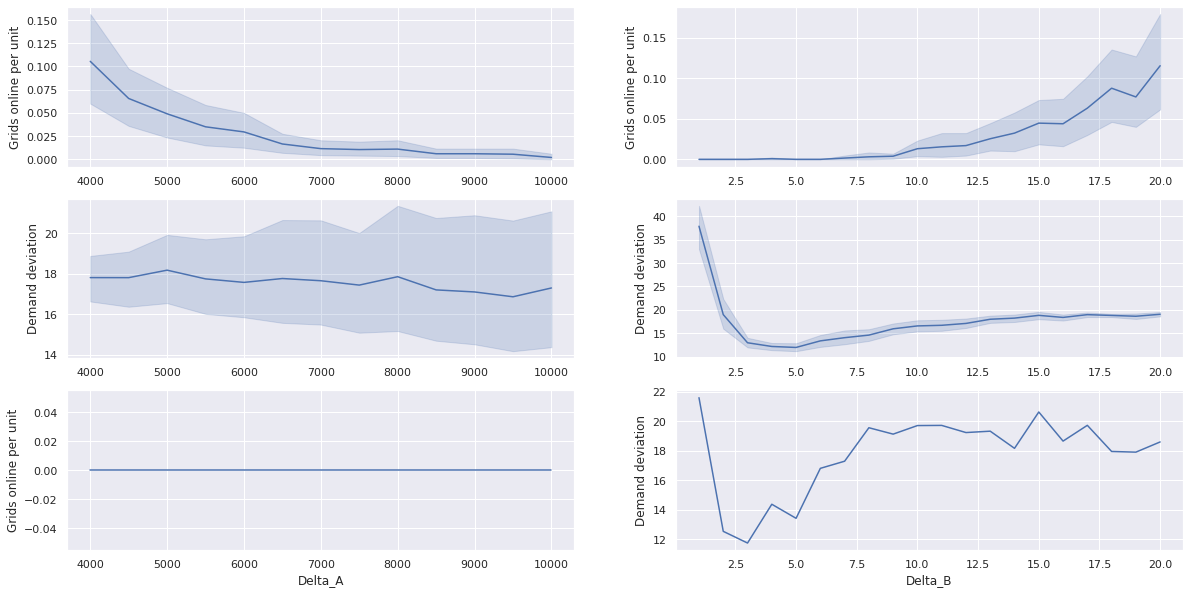

In [94]:
fig, ax = plt.subplots(3,2, figsize=(20, 10))

sns.lineplot(data=mean1, x="Delta_A", y="Restriction1", ax=ax[0,0])
ax[0,0].set_ylabel('Grids online per unit')
ax[0,0].set_xlabel('')

sns.lineplot(data=mean2, x="Delta_A", y="Restriction2", ax=ax[1,0])
ax[1,0].set_ylabel('Demand deviation')
ax[1,0].set_xlabel('')

sns.lineplot(data=mean1, x="Delta_B", y="Restriction1", ax=ax[0,1])
ax[0,1].set_ylabel('Grids online per unit')
ax[0,1].set_xlabel('')

sns.lineplot(data=mean2, x="Delta_B", y="Restriction2", ax=ax[1,1])
ax[1,1].set_ylabel('Demand deviation')
ax[1,1].set_xlabel('')

mean1_v = mean1.loc[mean1.Delta_B == 3]
mean2_v = mean2.loc[mean2.Delta_A == 4000]

sns.lineplot(data=mean1_v, x="Delta_A", y="Restriction1", ax=ax[2,0])
ax[2,0].set_ylabel('Grids online per unit')

sns.lineplot(data=mean2_v, x="Delta_B", y="Restriction2", ax=ax[2,1])
ax[2,1].set_ylabel('Demand deviation')

Text(0, 0.5, 'Production cost, fixed Delta_A')

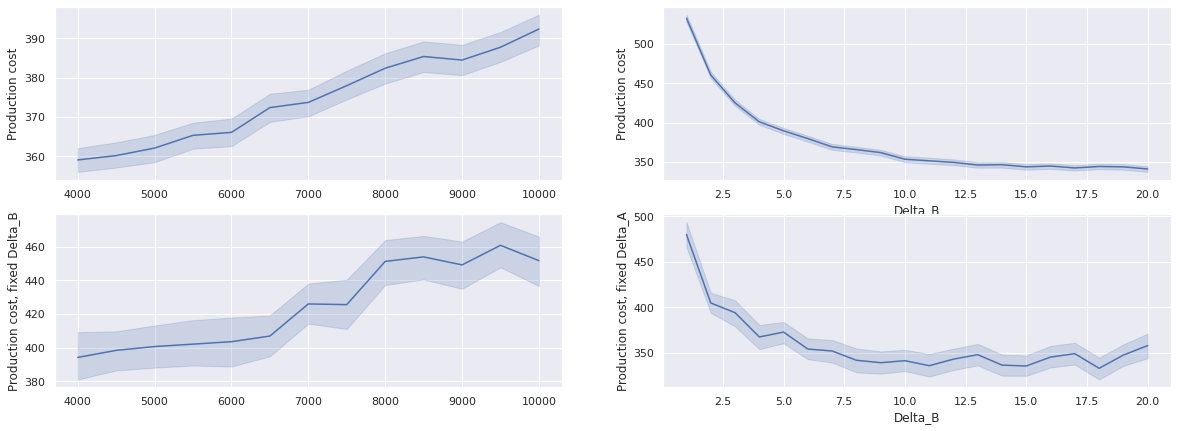

In [96]:
fig, ax = plt.subplots(2,2, figsize=(20, 7))


sns.lineplot(data=data, x="Delta_A", y="Pcost", ax=ax[0,0])
ax[0,0].set_ylabel('Production cost')
ax[0,0].set_xlabel('')

sns.lineplot(data=data, x="Delta_B", y="Pcost", ax=ax[0,1])
ax[0,1].set_ylabel('Production cost')


data_v = data.loc[data.Delta_B == 3]
data2_v = data.loc[data.Delta_A == 4000]

sns.lineplot(data=data_v, x="Delta_A", y="Pcost", ax=ax[1,0])
ax[1,0].set_ylabel('Production cost, fixed Delta_B')
ax[1,0].set_xlabel('')

sns.lineplot(data=data2_v, x="Delta_B", y="Pcost", ax=ax[1,1])
ax[1,1].set_ylabel('Production cost, fixed Delta_A')


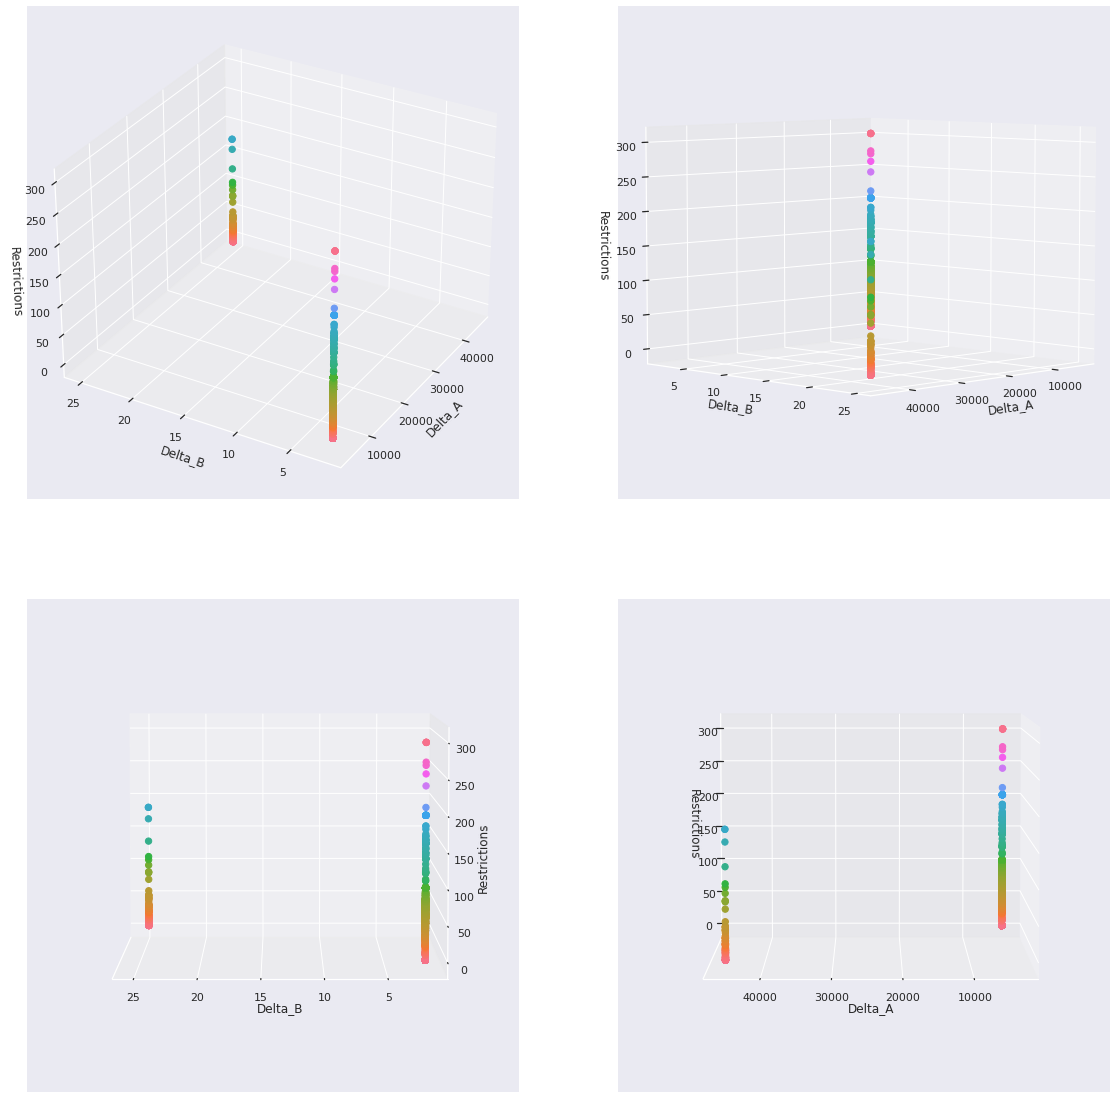

In [11]:
# axes instance
fig = plt.figure(figsize=(30,20))
az1 = fig.add_subplot(231, projection='3d')
az2 = fig.add_subplot(232, projection='3d')
ayz = fig.add_subplot(234, projection='3d')
axz = fig.add_subplot(235, projection='3d')

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot 1
sc1 = az1.scatter(data.Delta_A, data.Delta_B, data.Restrictions, s=40, c=data.Restrictions, marker='o', cmap=cmap, alpha=1)
az1.set_xlabel('Delta_A')
az1.set_ylabel('Delta_B')
az1.set_zlabel('Restrictions')
az1.view_init(30, 210)

# plot 2
sc2 = az2.scatter(data.Delta_A, data.Delta_B, data.Restrictions, s=40, c=data.Restrictions, marker='o', cmap=cmap, alpha=1)
az2.set_xlabel('Delta_A')
az2.set_ylabel('Delta_B')
az2.set_zlabel('Restrictions')
az2.view_init(5, 45)

# plot 2
sc3 = ayz.scatter(data.Delta_A, data.Delta_B, data.Restrictions, s=40, c=data.Restrictions, marker='o', cmap=cmap, alpha=1)
ayz.set_ylabel('Delta_B')
ayz.set_zlabel('Restrictions')
ayz.xaxis.set_major_formatter(plt.NullFormatter())
ayz.xaxis.set_major_locator(plt.NullLocator())
#ayz.yaxis.set_major_locator(ticker.MultipleLocator(50))
ayz.view_init(5, 180)

# plot 2
sc4 = axz.scatter(data.Delta_A, data.Delta_B, data.Restrictions, s=40, c=data.Restrictions, marker='o', cmap=cmap, alpha=1)
axz.set_xlabel('Delta_A')
axz.set_zlabel('Restrictions')
axz.yaxis.set_major_formatter(plt.NullFormatter())
axz.yaxis.set_major_locator(plt.NullLocator())
#axz.xaxis.set_major_locator(ticker.MultipleLocator(500))
axz.view_init(5, 90)

# legend
